# Mining the impeachment transcripts

In [1]:
import pandas as pd
import numpy as np

## Load data

The files are named by date, `2019-11-13.xlsx` and upwards, as shown in the list below.

We load them and combine them into a single DataFrame.

In [2]:
dates = [ '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21' ]
speech = pd.DataFrame()
for date in dates:
    tmp = pd.read_excel( date+'.xlsx', sheet_name=0 )
    tmp['Date'] = pd.to_datetime( date )
    speech = speech.append( tmp, ignore_index=True )
speech = speech[['Date','Time','Speaker','Text']]
speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2990 non-null   datetime64[ns]
 1   Time     2989 non-null   object        
 2   Speaker  2990 non-null   object        
 3   Text     2983 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 93.6+ KB


(Due to a current limitation in DeepNote, we must wrap `speech.head()` in a `print` statement.)

In [3]:
speech.head()

,Date,Time,Speaker,Text
0,2019-11-13,10:00:00,The Speaker Pro Tempore,THE HOUSE WILL BE IN ORDER. THE CHAIR LAYS BEF...
1,2019-11-13,10:00:08,The Clerk,"THE SPEAKER'S ROOMS, WASHINGTON, D.C. NOVEMBER..."
2,2019-11-13,10:00:24,The Speaker Pro Tempore,PURSUANT TO THE ORDER OF THE HOUSE OF JANUARY ...
3,2019-11-13,10:01:07,Mr. Green,"THANK YOU, MR. SPEAKER. MR. SPEAKER, IT AND ST..."
4,2019-11-13,10:04:09,The Speaker Pro Tempore,MEMBERS ARE REMINDED TO REFRAIN FROM ENGAGING ...


## Last Names

We compute last names by extracting them from the speaker's name, and discarding words known to not be a last name.

TO DO: There are definitely some other cleanup steps that ought to be done, as you can see further below, but this is a good start.

In [4]:
speech['Last Name'] = speech['Speaker'].apply( lambda x: x.split( ' ' )[-1:][0].upper() )
speech.loc[speech['Last Name'].isin(['TEMPORE','CLERK',']','CHAIR','SECRETARY']),'Last Name'] = np.nan
speech.head()

,Date,Time,Speaker,Text,Last Name
0,2019-11-13,10:00:00,The Speaker Pro Tempore,THE HOUSE WILL BE IN ORDER. THE CHAIR LAYS BEF...,NaN
1,2019-11-13,10:00:08,The Clerk,"THE SPEAKER'S ROOMS, WASHINGTON, D.C. NOVEMBER...",NaN
2,2019-11-13,10:00:24,The Speaker Pro Tempore,PURSUANT TO THE ORDER OF THE HOUSE OF JANUARY ...,NaN
3,2019-11-13,10:01:07,Mr. Green,"THANK YOU, MR. SPEAKER. MR. SPEAKER, IT AND ST...",GREEN
4,2019-11-13,10:04:09,The Speaker Pro Tempore,MEMBERS ARE REMINDED TO REFRAIN FROM ENGAGING ...,NaN


In [5]:
speech['Last Name'].unique()

array([nan, 'GREEN', 'MITCHELL', 'FOXX', 'BROOKS', 'EMMER', 'VEASEY',
       'COMER', 'STEIL', 'WRIGHT', 'THOMPSON', 'PENCE', 'SPEAKER',
       'CHAPLAIN', 'PETERS', 'HAALAND', 'HIGGINS', 'NEWHOUSE', 'MURPHY',
       'ANY', 'AXNE', 'ROSE', 'MORELLE', 'PAPPAS', 'MALINOWSKI', 'RASKIN',
       'COLLINS', 'NORTON', 'CHABOT', 'STANTON', 'SCHNEIDER', 'SERVE',
       'SPANO', 'BALDERSON', 'KIM', 'BURCHETT', 'DELGADO', 'DAVIDS',
       'KELLY', 'GONZALEZ-COLON', 'GARCIA', 'LOUDERMILK', 'FITZPATRICK',
       'DESAULNIER', 'SPEIER', 'PAYNE', 'DAVIS', 'KELLER', 'POWELL',
       'MUCARSEL-POWELL', 'GUEST', 'SPANBERGER', 'DREW', 'LAMALFA',
       'ESPAILLAT', 'COSTA', 'VARGAS', 'CORREA', 'SOTO', 'BARRAGAN',
       'BYRNE', 'SUPREMACY', 'HOYER', 'BUDD', 'COURTNEY', 'ROY',
       'SLOTKIN', 'ABRAHAM', 'GOEMZ', 'GOMEZ', 'MARSHALL', 'CROW',
       'WILSON', 'DEUTCH', 'CRIST', 'WILLIAMS', 'DEAN', 'LIPINSKI',
       'PLASKETT', 'LEE', 'CICILLINE', 'WOODALL', 'LUCAS', 'NAY',
       'WALORSKI', 'WATERS', '

## Get representative names

The representatives are stored in a table extracted from Wikipedia.  Let's load that now.

In [6]:
reps = pd.read_excel( 'House-of-Representatives-2020-03-04.xlsx', sheet_name=0 )
reps['Last Name'] = reps['Member'].apply( lambda x: x.split( ' ' )[-1:][0].upper() )
gap = reps.iloc[0,0][7]
reps['State'] = reps['District'].apply( lambda x: x.split( gap )[0].upper() )
reps.head()

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Last Name,State
0,Alabama 1,Bradley Byrne,Republican,Alabama Senate Alabama State Board of Education,Duke University ( BA ) University of Alabama (...,2014 (Special),Fairhope,1955.0,BYRNE,ALABAMA
1,Alabama 2,Martha Roby,Republican,"Montgomery, Alabama City Council",New York University ( BM ) Samford University ...,2011,Montgomery,1976.0,ROBY,ALABAMA
2,Alabama 3,Mike Rogers,Republican,"Calhoun County, Alabama Commissioner Alabama H...","Jacksonville State University ( BA , MPA ) Bir...",2003,Saks,1958.0,ROGERS,ALABAMA
3,Alabama 4,Robert Aderholt,Republican,"Haleyville, Alabama Municipal Judge",University of North Alabama Birmingham–Souther...,1997,Haleyville,1965.0,ADERHOLT,ALABAMA
4,Alabama 5,Mo Brooks,Republican,Alabama House of Representatives Madison Count...,Duke University ( BA ) University of Alabama (...,2011,Huntsville,1954.0,BROOKS,ALABAMA


## Joining the tables

To join these tables, we need to match up representative names in the one with the other.  Unfortunately, they are not always unique.

So we try to match up representative names and double-check them against the state mentioned in the introductory comments before the speaker begins speaking.

In [7]:
def guess_rep_index ( i ):
    last_name = speech.loc[i,'Last Name']
    intro = speech.loc[i-1,'Text'][-100:] if i > 0 and type( speech.loc[i-1,'Text'] ) == str else ''
    matches = [ j for j in list( reps.index ) if reps.loc[j,'Last Name'] == last_name ]
    if len( matches ) == 1:
        return matches[0]
    for m in matches:
        if reps.loc[m,'State'] in intro:
            return m
    return np.nan
speech['Guesses'] = [ guess_rep_index( i ) for i in speech.index ]
speech['Guesses'].value_counts()

22.0     59
293.0    55
63.0     45
24.0     44
288.0    37
         ..
95.0      1
408.0     1
134.0     1
66.0      1
207.0     1
Name: Guesses, Length: 203, dtype: int64

This seems to successfully classify over $\frac13$ of the speakers:

In [8]:
speech['Guesses'].isnull().value_counts()

True     1964
False    1026
Name: Guesses, dtype: int64

## Process speech content

Load the tools needed for natural language processing.

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/nathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nathan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lemmatize and tokenize speeches to get the most important words only, and in canonical forms.

In [10]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def tokenize ( text ):
    for char in string.punctuation:
        text = text.replace( char, ' ' )
    result = [ ]
    words = [ w for w in text.split( ' ' ) if w != '' ]
    for token, tag in pos_tag(words):
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        token = lemmatizer.lemmatize(token, pos)
        if len(token) > 0 and token.lower() not in stop_words:
            result.append(token.lower())
    return result

# tokenize( 'You are one of the best kids I\'ve ever met, you know that?' )
### ==> ['one', 'best', 'kid', 'ever', 'meet', 'know']

def simplify ( text ):
    return ' '.join( tokenize( text ) ) if type( text ) == str else np.nan

In [11]:
speech['Simple Text'] = speech['Text'].apply( simplify )
speech.head()

,Date,Time,Speaker,Text,Last Name,Guesses,Simple Text
0,2019-11-13,10:00:00,The Speaker Pro Tempore,THE HOUSE WILL BE IN ORDER. THE CHAIR LAYS BEF...,NaN,NaN,house order chair lays house communication spe...
1,2019-11-13,10:00:08,The Clerk,"THE SPEAKER'S ROOMS, WASHINGTON, D.C. NOVEMBER...",NaN,NaN,speaker rooms washington c november 13 2019 he...
2,2019-11-13,10:00:24,The Speaker Pro Tempore,PURSUANT TO THE ORDER OF THE HOUSE OF JANUARY ...,NaN,NaN,pursuant order house january 3 2019 chair reco...
3,2019-11-13,10:01:07,Mr. Green,"THANK YOU, MR. SPEAKER. MR. SPEAKER, IT AND ST...",GREEN,369.0,thank mr speaker mr speaker still rise still r...
4,2019-11-13,10:04:09,The Speaker Pro Tempore,MEMBERS ARE REMINDED TO REFRAIN FROM ENGAGING ...,NaN,NaN,members reminded refrain engaging personalitie...


In [12]:
all_words = ' '.join( [ t for t in list( speech['Simple Text'] ) if type( t ) == str ] ).split( ' ' )
word_counts = pd.Series( all_words ).value_counts()
word_counts

gentleman    1422
mr           1335
bill         1144
time         1079
speaker      1042
             ... 
mornedize       1
hygiene         1
thaddeus        1
advertise       1
woodland        1
Length: 12689, dtype: int64

In [13]:
tagged_words = pos_tag( [ w for w in word_counts.index if len( w ) > 0 ] )
tagged_adjs = [ pair[0] for pair in tagged_words if pair[1][:2] == 'JJ' ]
', '.join(list(word_counts[tagged_adjs].index[:200]))

'h, want, american, many, united, new, important, first, u, national, bipartisan, small, senate, good, great, unanimous, federal, consent, urge, im, better, last, north, long, social, kong, pursuant, proud, colleague, give, yeas, public, economic, mental, bible, native, military, strong, human, able, political, bring, best, rural, high, future, financial, young, osha, critical, suspend, keep, chinese, florida, ordered, live, standard, congressional, pay, perry, legislative, hard, clear, foreign, ohio, real, past, next, possible, partisan, special, speak, different, local, full, appreciate, general, open, usmca, start, medical, global, county, illinois, black, big, unfortunately, f, stop, whole, private, bad, ayes, previous, enough, additional, african, pro, improve, single, faith, underlying, little, affordable, second, known, green, tonight, respect, current, entire, commercial, former, lead, true, democratic, effective, supreme, free, major, international, old, n, gun, v, fiscal, nat

## Merge tables

In [14]:
merged = pd.merge( speech, reps, left_on='Guesses', right_index=True, how='inner' )
merged.head()

,Date,Time,Speaker,Text,Last Name_x,Guesses,Simple Text,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Last Name_y,State
3,2019-11-13,10:01:07,Mr. Green,"THANK YOU, MR. SPEAKER. MR. SPEAKER, IT AND ST...",GREEN,369.0,thank mr speaker mr speaker still rise still r...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS
369,2019-11-13,18:41:39,Mr. Green,"THANK YOU, MADAM SPEAKER. MADAM SPEAKER, AND S...",GREEN,369.0,thank madam speaker madam speaker still rise r...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS
373,2019-11-13,19:03:38,Mr. Green,"MADAM SPEAKER, I DO NOW MOVE THAT THE HOUSE AD...",GREEN,369.0,madam speaker move house adjourn,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS
1231,2019-11-18,16:19:29,Mr. Green,I ASK UNANIMOUS CONSENT THAT ALL MEMBERS HAVE ...,GREEN,369.0,ask unanimous consent members five legislative...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS
1245,2019-11-18,16:33:05,Mr. Green,I'M HORPPED AT THIS TIME TO YIELD ONE MINUTE T...,GREEN,369.0,horpped time yield one minute honorable leader...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS


In [15]:
len(merged)

1026

## Add features

In [16]:
merged['Text Length'] = merged['Text'].apply( lambda x: len(x) if type(x)==str else 0 )
merged.head()

,Date,Time,Speaker,Text,Last Name_x,Guesses,Simple Text,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Last Name_y,State,Text Length
3,2019-11-13,10:01:07,Mr. Green,"THANK YOU, MR. SPEAKER. MR. SPEAKER, IT AND ST...",GREEN,369.0,thank mr speaker mr speaker still rise still r...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS,2169
369,2019-11-13,18:41:39,Mr. Green,"THANK YOU, MADAM SPEAKER. MADAM SPEAKER, AND S...",GREEN,369.0,thank madam speaker madam speaker still rise r...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS,2858
373,2019-11-13,19:03:38,Mr. Green,"MADAM SPEAKER, I DO NOW MOVE THAT THE HOUSE AD...",GREEN,369.0,madam speaker move house adjourn,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS,52
1231,2019-11-18,16:19:29,Mr. Green,I ASK UNANIMOUS CONSENT THAT ALL MEMBERS HAVE ...,GREEN,369.0,ask unanimous consent members five legislative...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS,204
1245,2019-11-18,16:33:05,Mr. Green,I'M HORPPED AT THIS TIME TO YIELD ONE MINUTE T...,GREEN,369.0,horpped time yield one minute honorable leader...,Texas 9,Al Green,Democratic,"Harris County, Texas Justice of the Peace , Ho...",Florida A&M University Tuskeegee University ( ...,2005,Houston,1947.0,GREEN,TEXAS,112


## Try random things now

In [17]:
dem_words = [ ]
rep_words = [ ]
def check_word_party ( word ):
    global dem_words, rep_words
    where_word = merged['Simple Text'].apply( lambda text: type(text) == str and word in text )
    results = merged[where_word]['Party'].value_counts()
    dem = results['Democratic'] if 'Democratic' in results.index else 0
    rep = results['Republican'] if 'Republican' in results.index else 0
    if dem > 1.5*rep:
        dem_words.append( word )
    if rep > 1.5*dem:
        rep_words.append( word )
# important_words = [ 'american', 'united', 'national', 'bipartisan', 'senate', 'unanimous', 'federal', 'social',
#     'bible', 'military', 'strong', 'political', 'rural', 'financial', 'chinese', 'foreign', 'partisan', 'freedom',
#     'mexico', 'global', 'black', 'impeachment', 'daca', 'commitment', 'true', 'supreme', 'international', 'white',
#     'difficult', 'fair', 'ukraine', 'serious', 'extraneous', 'necessary', 'wrong', 'personal', 'honorable' ]
common_adjs = word_counts[tagged_adjs].index[word_counts[tagged_adjs] > 50]
for word in common_adjs:
    check_word_party( word )
print( '%d Democratic words:' % len(dem_words) )
print( dem_words )
print( '%d Republican words:' % len(rep_words) )
print( rep_words )

15 Democratic words:
['unanimous', 'consent', 'urge', 'pursuant', 'critical', 'suspend', 'pay', 'legislative', 'hard', 'local', 'illinois', 'black', 'african', 'underlying', 'affordable']
19 Republican words:
['give', 'yeas', 'public', 'bible', 'military', 'political', 'rural', 'chinese', 'perry', 'real', 'different', 'appreciate', 'general', 'usmca', 'big', 'bad', 'faith', 'little', 'second']


In [18]:
import matplotlib.pyplot as plt

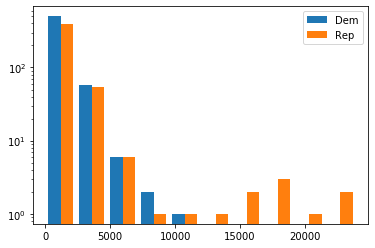

In [19]:
plt.hist( [ merged[merged['Party']=='Democratic']['Text Length'],
            merged[merged['Party']=='Republican']['Text Length'] ], label=['Dem','Rep'] )
plt.legend()
plt.yscale( 'log' )
plt.show()

In [20]:
sum( merged[merged['Party']=='Democratic']['Text Length'] ), \
sum( merged[merged['Party']=='Republican']['Text Length'] )

(500319, 601243)

In [21]:
len( merged[merged['Party']=='Democratic']['Text Length'] ), \
len( merged[merged['Party']=='Republican']['Text Length'] )

(568, 458)

In [22]:
merged[merged['Party']=='Democratic']['Text Length'].mean(), \
merged[merged['Party']=='Republican']['Text Length'].mean()

(880.8433098591549, 1312.7576419213974)

In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 3 to 2972
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1026 non-null   datetime64[ns]
 1   Time              1026 non-null   object        
 2   Speaker           1026 non-null   object        
 3   Text              1025 non-null   object        
 4   Last Name_x       1026 non-null   object        
 5   Guesses           1026 non-null   float64       
 6   Simple Text       1025 non-null   object        
 7   District          1026 non-null   object        
 8   Member            1026 non-null   object        
 9   Party             1026 non-null   object        
 10  Prior experience  1026 non-null   object        
 11  Education         1026 non-null   object        
 12  Assumed office    1026 non-null   object        
 13  Residence         1026 non-null   object        
 14  Born              1026 n

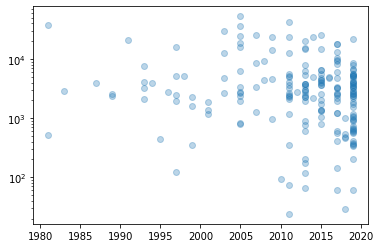

In [24]:
merged['Simple assumed'] = merged['Assumed office'].apply( lambda x: str(x)[:4] ).astype( int )
data = merged.groupby( 'Member' )[['Simple assumed','Text Length']].agg({'Simple assumed':'first','Text Length':'sum'})
plt.scatter( x=data['Simple assumed'], y=data['Text Length'], alpha=0.3 )
plt.yscale( 'log' )
plt.show()

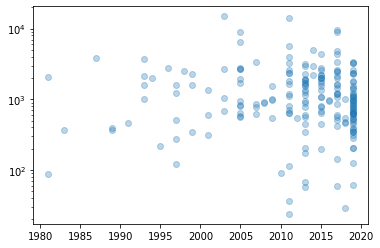

In [25]:
data = merged.groupby( 'Member' )[['Simple assumed','Text Length']].agg({'Simple assumed':'first','Text Length':'mean'})
plt.scatter( x=data['Simple assumed'], y=data['Text Length'], alpha=0.3 )
plt.yscale( 'log' )
plt.show()

## Get time from speech?

Turns out you can't seem to do this.  I tried here but found only 36 of the thousands of texts had any detectable times.

In [26]:
def get_time_in_seconds ( important_words ):
    if type( important_words ) != str:
        return None
    important_words = important_words.split( ' ' )
    if 'minute' in important_words:
        minute_index = len( important_words ) - 1 - important_words[::-1].index( 'minute' )
    else:
        minute_index = None
    if 'second' in important_words:
        second_index = len( important_words ) - 1 - important_words[::-1].index( 'second' )
    else:
        second_index = None
    if minute_index is None and second_index is None:
        return None
    if minute_index is None:
        index = second_index
    elif second_index is None:
        index = minute_index
    else:
        index = max( minute_index, second_index )
    if index == 0:
        return None
    unit = important_words[index]
    seconds = 60 if unit == 'minute' else 1
    quantity = important_words[index-1]
    conversion = { 'one' : 1, 'five' : 5, 'two' : 2, 'three' : 3, '30' : 30, 'four' : 4, '20' : 20,
                   '50' : 50, '90' : 90, '15' : 15, '45' : 45, 'a' : 1 }
    min_reasonable = 15  # nobody got <30sec to talk ("one second" == figure of speech)
    max_reasonable = 300 # nobody got >5min to talk ("30 minutes" == time of a recess)
    if quantity in conversion:
        result = conversion[quantity] * seconds
        if min_reasonable <= result <= max_reasonable:
            return result
    return None
merged['Simple Text'].apply( get_time_in_seconds ).value_counts()

60.0     34
300.0     2
Name: Simple Text, dtype: int64

What if we try with the original text?  Seems better...you get 106 now.  Still only 10% of speeches.

In [27]:
def get_time_in_seconds2 ( all_words ):
    if type( all_words ) != str:
        return None
    for char in string.punctuation:
        all_words = all_words.replace( char, ' ' )
    all_words = all_words.replace( 'MINUTES', 'MINUTE' )
    all_words = all_words.replace( 'SECONDS', 'SECOND' )
    all_words = all_words.lower().split( ' ' )
    if 'minute' in all_words:
        minute_index = len( all_words ) - 1 - all_words[::-1].index( 'minute' )
    else:
        minute_index = None
    if 'second' in all_words:
        second_index = len( all_words ) - 1 - all_words[::-1].index( 'second' )
    else:
        second_index = None
    if minute_index is None and second_index is None:
        return None
    if minute_index is None:
        index = second_index
    elif second_index is None:
        index = minute_index
    else:
        index = max( minute_index, second_index )
    if index == 0:
        return None
    unit = all_words[index]
    seconds = 60 if unit == 'minute' else 1
    quantity = all_words[index-1]
    conversion = { 'one' : 1, 'five' : 5, 'two' : 2, 'three' : 3, '30' : 30, 'four' : 4, '20' : 20,
                   '50' : 50, '90' : 90, '15' : 15, '45' : 45, 'a' : 1 }
    min_reasonable = 15  # nobody got <30sec to talk ("one second" == figure of speech)
    max_reasonable = 300 # nobody got >5min to talk ("30 minutes" == time of a recess)
    if quantity in conversion:
        result = conversion[quantity] * seconds
        if min_reasonable <= result <= max_reasonable:
            return result
    return None
merged['Text'].apply( get_time_in_seconds2 ).value_counts()

60.0     36
120.0    22
300.0    19
180.0    19
240.0     4
30.0      4
20.0      1
90.0      1
Name: Text, dtype: int64